In [1]:
from matplotlib.ticker import LogFormatter

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
energy_df = pd.read_csv("results/3bpa_lrscan_energy.csv")
forces_df = pd.read_csv("results/3bpa_lrscan_forces.csv")
lr_df = pd.read_csv("results/3bpa_lrscan_lr.csv")

In [3]:
run_names = {
    (0.03, 1): "jsek6sl2-116",
    (0.03, 10): "8cpbv0o1-119",
    (0.01, 1): "6gk9uial-111",
    (0.01, 10): "4ojp66b1-114",
    (0.003, 1): "llroik6o-118",
    (0.003, 10): "lcfwx2ma-116", 
}

In [56]:
def plot_metric(df, metric_name, ylabel, ymin=None,ymax=None, yfactor=1, logscale=False):
    for (lr, force_factor), run_name in run_names.items():
        plt.plot(df["Step"], yfactor * df[f"{run_name} - {metric_name}"], label=f"lr={lr}, $\\alpha$={force_factor}", linewidth=0.8)
    if logscale:
        plt.yscale("log")
        class SmartDecimalFormatter(LogFormatter):
            def _num_to_string(self, x, vmin, vmax):
                return f"{x:g}"
        formatter = SmartDecimalFormatter()
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.gca().yaxis.set_minor_formatter(formatter)
    if ymax is not None:
        plt.ylim(ymin, ymax)
    plt.xlabel("step [#batches]")
    plt.ylabel(ylabel)
    plt.ticklabel_format(axis='x', style='sci', scilimits=(0,6))
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.legend()

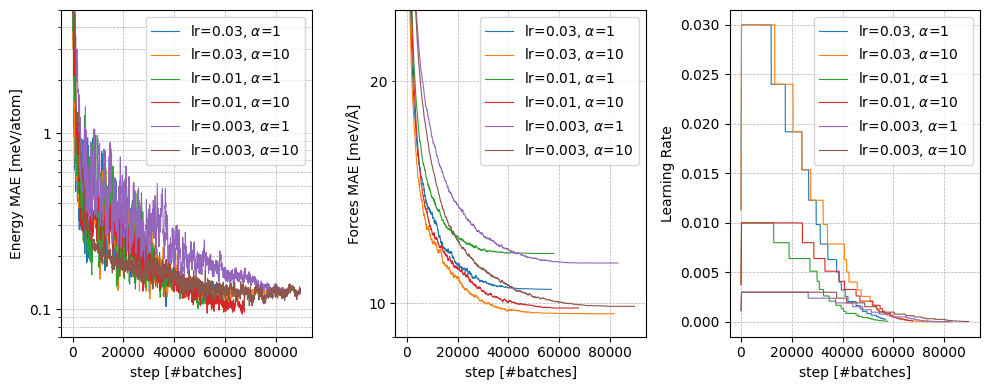

In [63]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plot_metric(energy_df, "val/energy_mae_per_atom", "Energy MAE [meV/atom]", ymin=0.07, ymax=5, yfactor=1000, logscale=True)
plt.subplot(1, 3, 2)
plot_metric(forces_df, "val/force_mae", "Forces MAE [meV/Å]", ymin=9, ymax=25, yfactor=1000, logscale=True)
plt.subplot(1, 3, 3)
plot_metric(lr_df, "learning_rate", "Learning Rate")
plt.tight_layout()
plt.savefig("plots/3bpa_lrscan.pdf", dpi=300)
plt.savefig("plots/3bpa_lrscan.png", dpi=300)
plt.show()